In [1]:
%load_ext autoreload
%autoreload 2

In [10]:
import pandas as pd
import numpy as np
from prnn.utils.predictiveNet import PredictiveNet
from prnn.utils.agent import RatInABoxAgent, RandomActionAgent
import itertools
import torch
import random
from prnn.utils.env import make_env
from prnn.utils.general import saveFig
from prnn.utils.figures import TrainingFigure
import matplotlib.pyplot as plt
from prnn.analysis.SpatialTuningAnalysis import SpatialTuningAnalysis
from prnn.analysis.OfflineTrajectoryAnalysis import OfflineTrajectoryAnalysis
from prnn.analysis.OfflineActivityAnalysis import SpontaneousActivityAnalysis
from prnn.analysis.representationalGeometryAnalysis import representationalGeometryAnalysis
from prnn.analysis.TuningCurveAnalysis import TuningCurveAnalysis

In [3]:
savefolder = 'Figures/RiaB/'

In [4]:
import os


os.chdir('/Users/hadrienpadilla/Documents/McGill/Peyrache Lab/pRNN')

netname = 'multRNN_5win_i0_o01-cpu'
netfolder = 'for_Hadrien/'
print(os.path.exists('nets/' + netfolder + netname + '.pkl'))
predictiveNet = PredictiveNet.loadNet(netfolder+netname)


# Use your ColorsReward shell (or whatever env you built)
env = predictiveNet.EnvLibrary[0]         


# Make sure the predictiveNet uses THIS env and the same n_obs
predictiveNet.env_shell = env

agent = RatInABoxAgent('Vis')

True
Net Loaded from pathname


In [5]:
STA = SpatialTuningAnalysis(predictiveNet, 
                            # timesteps_wake=20000,
                            inputControl=True,
                            untrainedControl=False,
                            agent=agent,
                            start_pos=0,
                            fig_type='pdf'
                            )

Getting Tuning Curves for Input Units


/Users/hadrienpadilla/Documents/McGill/Peyrache Lab/pRNN/.newenv/lib/python3.9/site-packages/pynapple/process/tuning_curves.py:378: RuntimeWarning: invalid value encountered in true_divide
  fxfr = fx / fr
/Users/hadrienpadilla/Documents/McGill/Peyrache Lab/pRNN/.newenv/lib/python3.9/site-packages/pynapple/process/tuning_curves.py:389: RuntimeWarning: invalid value encountered in true_divide
  SI = SI / fr[:, 0, 0]


Running WAKE
Calculating EV_s
Calculating EV_s for input control


/Users/hadrienpadilla/Documents/McGill/Peyrache Lab/pRNN/prnn/analysis/SpatialTuningAnalysis.py:165: RuntimeWarning: invalid value encountered in true_divide
  EVSpace = 1 - np.var(spaceRemoved,axis=0) / (np.var(WAKE_h,axis=0))


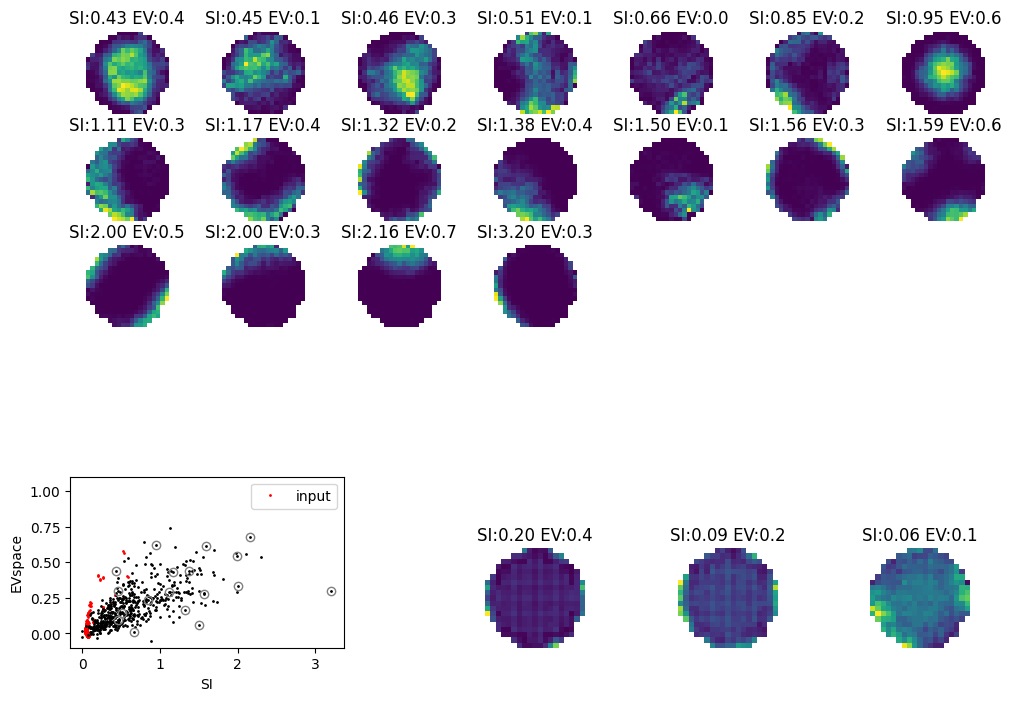

In [6]:
STA.SpatialTuningFigure(netname=netname,savefolder=savefolder,
                       exgrid=5)

In [7]:
RGA = representationalGeometryAnalysis(predictiveNet,
                                       timesteps_wake=20000,
                                       noisemag = 0,
                                       noisestd=0.05,
                                       withIsomap=True,
                                       actRSA = False,
                                       obsRSA=False,
                                       HDRSA = False,
                                       agent=agent,
                                       n_neighbors=50,
                                       fig_type='pdf',)

Running WAKE


/Users/hadrienpadilla/Documents/McGill/Peyrache Lab/pRNN/prnn/analysis/representationalGeometryAnalysis.py:279: RuntimeWarning: invalid value encountered in true_divide
  hist2 = hist2/np.sum(hist2,axis=0)


Running SLEEP
Fitting Isomap


/Users/hadrienpadilla/Documents/McGill/Peyrache Lab/pRNN/.newenv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:57: DeprecationWarning: Passing `np.nan` to mean no clipping in np.clip has always been unreliable, and is now deprecated. In future, this will always return nan, like it already does when min or max are arrays that contain nan. To skip a bound, pass either None or an np.inf of an appropriate sign.
  return bound(*args, **kwds)
/Users/hadrienpadilla/Documents/McGill/Peyrache Lab/pRNN/.newenv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:57: DeprecationWarning: Passing `np.nan` to mean no clipping in np.clip has always been unreliable, and is now deprecated. In future, this will always return nan, like it already does when min or max are arrays that contain nan. To skip a bound, pass either None or an np.inf of an appropriate sign.
  return bound(*args, **kwds)


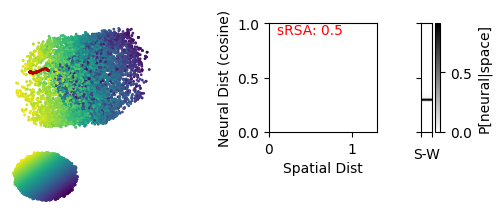

In [8]:
RGA.WakeSleepFigure(netname,savefolder)

In [11]:
TCA = TuningCurveAnalysis(predictiveNet)

Calculating EV_s
Running WAKE


/Users/hadrienpadilla/Documents/McGill/Peyrache Lab/pRNN/prnn/analysis/TuningCurveAnalysis.py:517: RuntimeWarning: Degrees of freedom <= 0 for slice
  cov = np.cov(coords.T)
/Users/hadrienpadilla/Documents/McGill/Peyrache Lab/pRNN/.newenv/lib/python3.9/site-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/hadrienpadilla/Documents/McGill/Peyrache Lab/pRNN/.newenv/lib/python3.9/site-packages/numpy/lib/function_base.py:2680: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


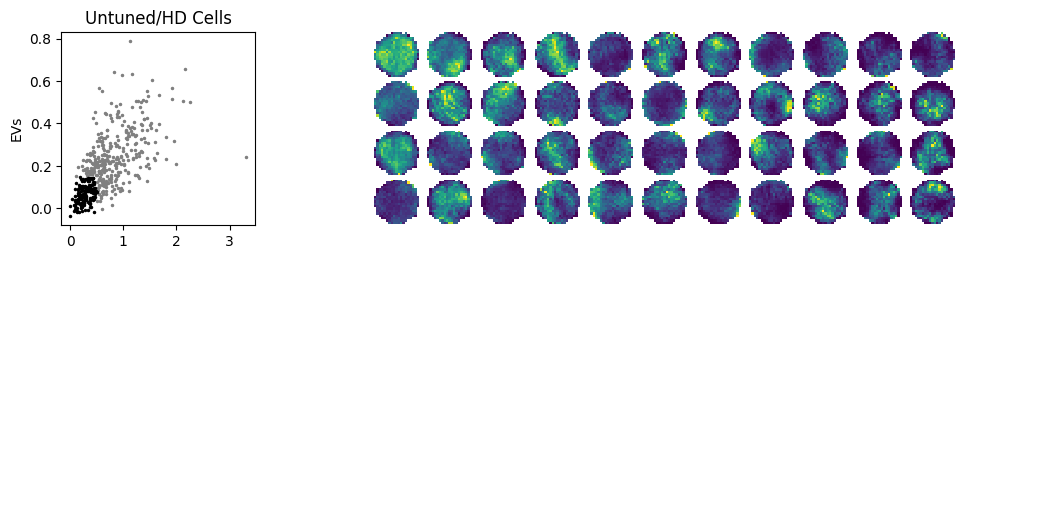

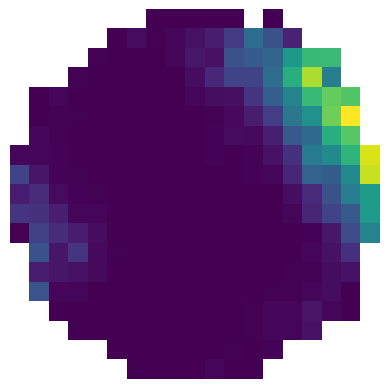

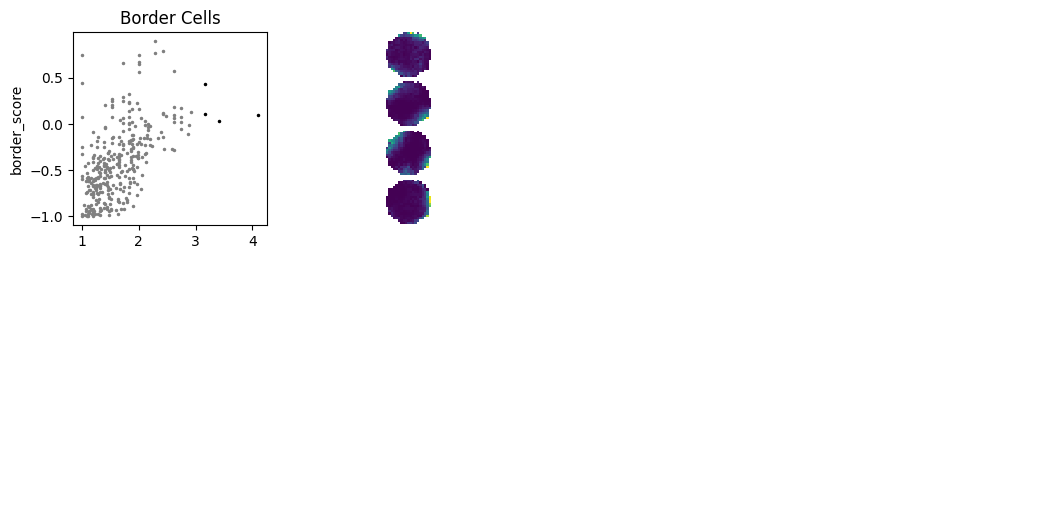

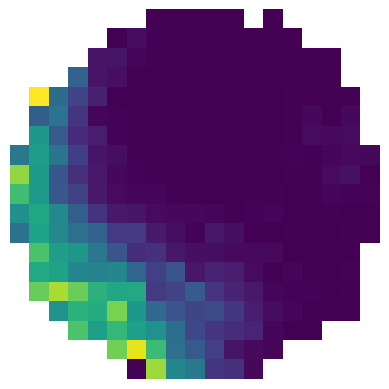

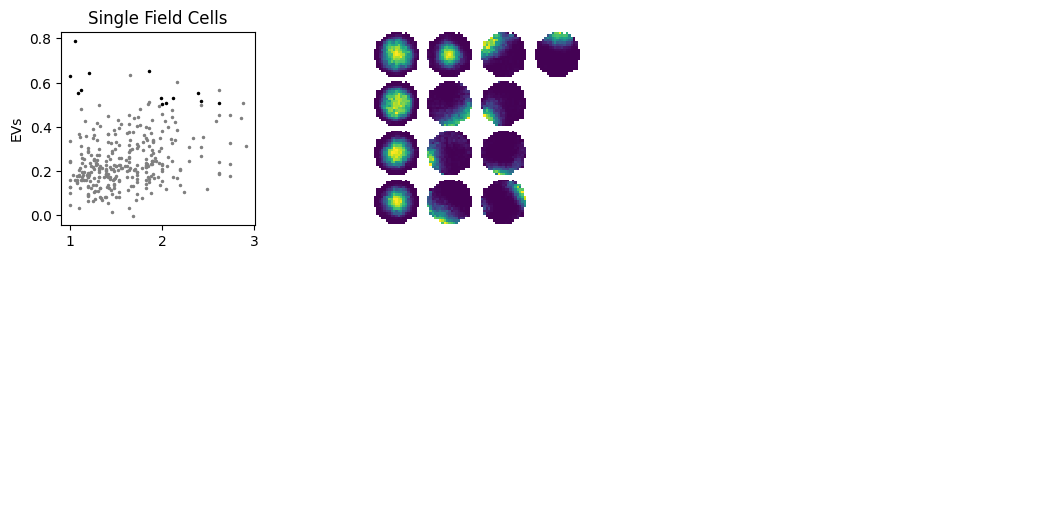

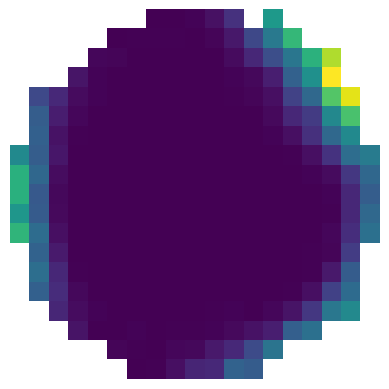

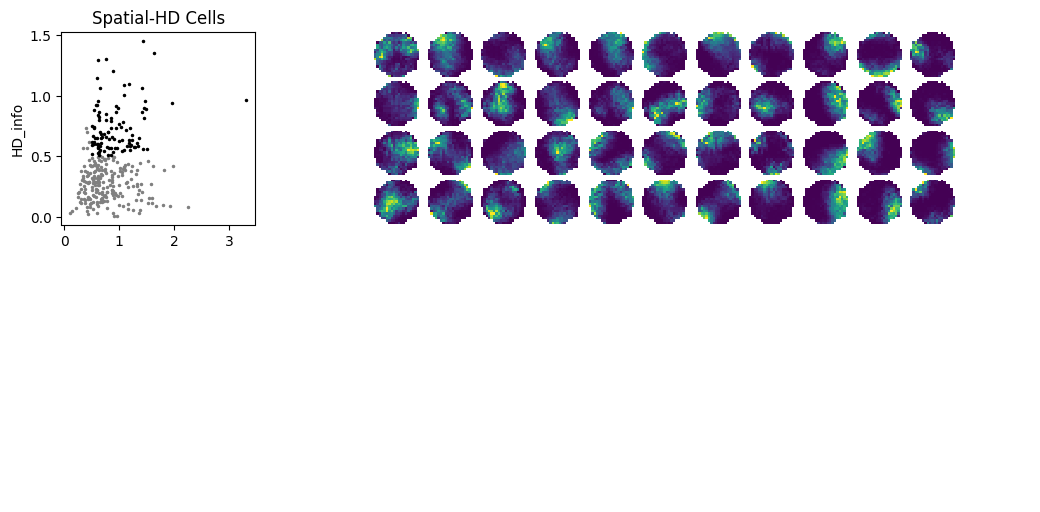

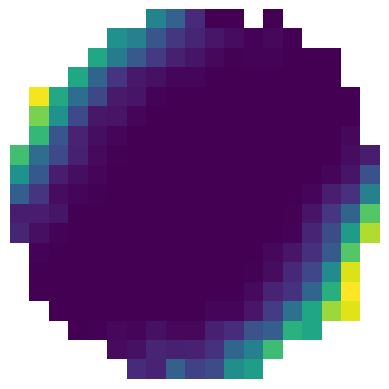

In [12]:
fig1, fig2, fig3, fig4 = TCA.cellClassificationFigures()